In [71]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [72]:
red = pd.read_csv('/Users/divyasusarla/Desktop/DSI-SF-2-divyasusarla/Capstone/LDA_analysis/red_formodel.csv', encoding='utf8')

In [73]:
del red['Unnamed: 0']
red.head(3)

,wine_index,red_wine,red_wineries,red_regions,red_countries,red_avg_wine_ratings,red_avg_price,vintage_year,review_index,red_user,...,t18,t19,t20,t21,t22,t23,t24,t25,max_prob,unique_probs
0,71,Pomerol 1997,P\xe9trus,Pomerol,France,4.8,1874.99,1997.0,0.0,Nudge Stratford,...,0.000000,0.156923,0.000000,0.08,0.080000,0.08,0.08,0.156923,t25,11.0
1,71,Pomerol 1997,P\xe9trus,Pomerol,France,4.8,1874.99,1997.0,1.0,Pastore Serafino,...,0.276364,0.000000,0.000000,0.00,0.276364,0.00,0.00,0.000000,t18,7.0
2,71,Pomerol 1997,P\xe9trus,Pomerol,France,4.8,1874.99,1997.0,2.0,Max@Berry Bros. & Rudd,...,0.000000,0.000000,0.148571,0.00,0.000000,0.00,0.00,0.000000,t4,5.0


In [74]:
def correlation_heat_map(self):
    corrs = red.corr()

    fig, ax = plt.subplots(figsize=(10, 8))

    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(corrs, mask=mask)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=70)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    plt.show()

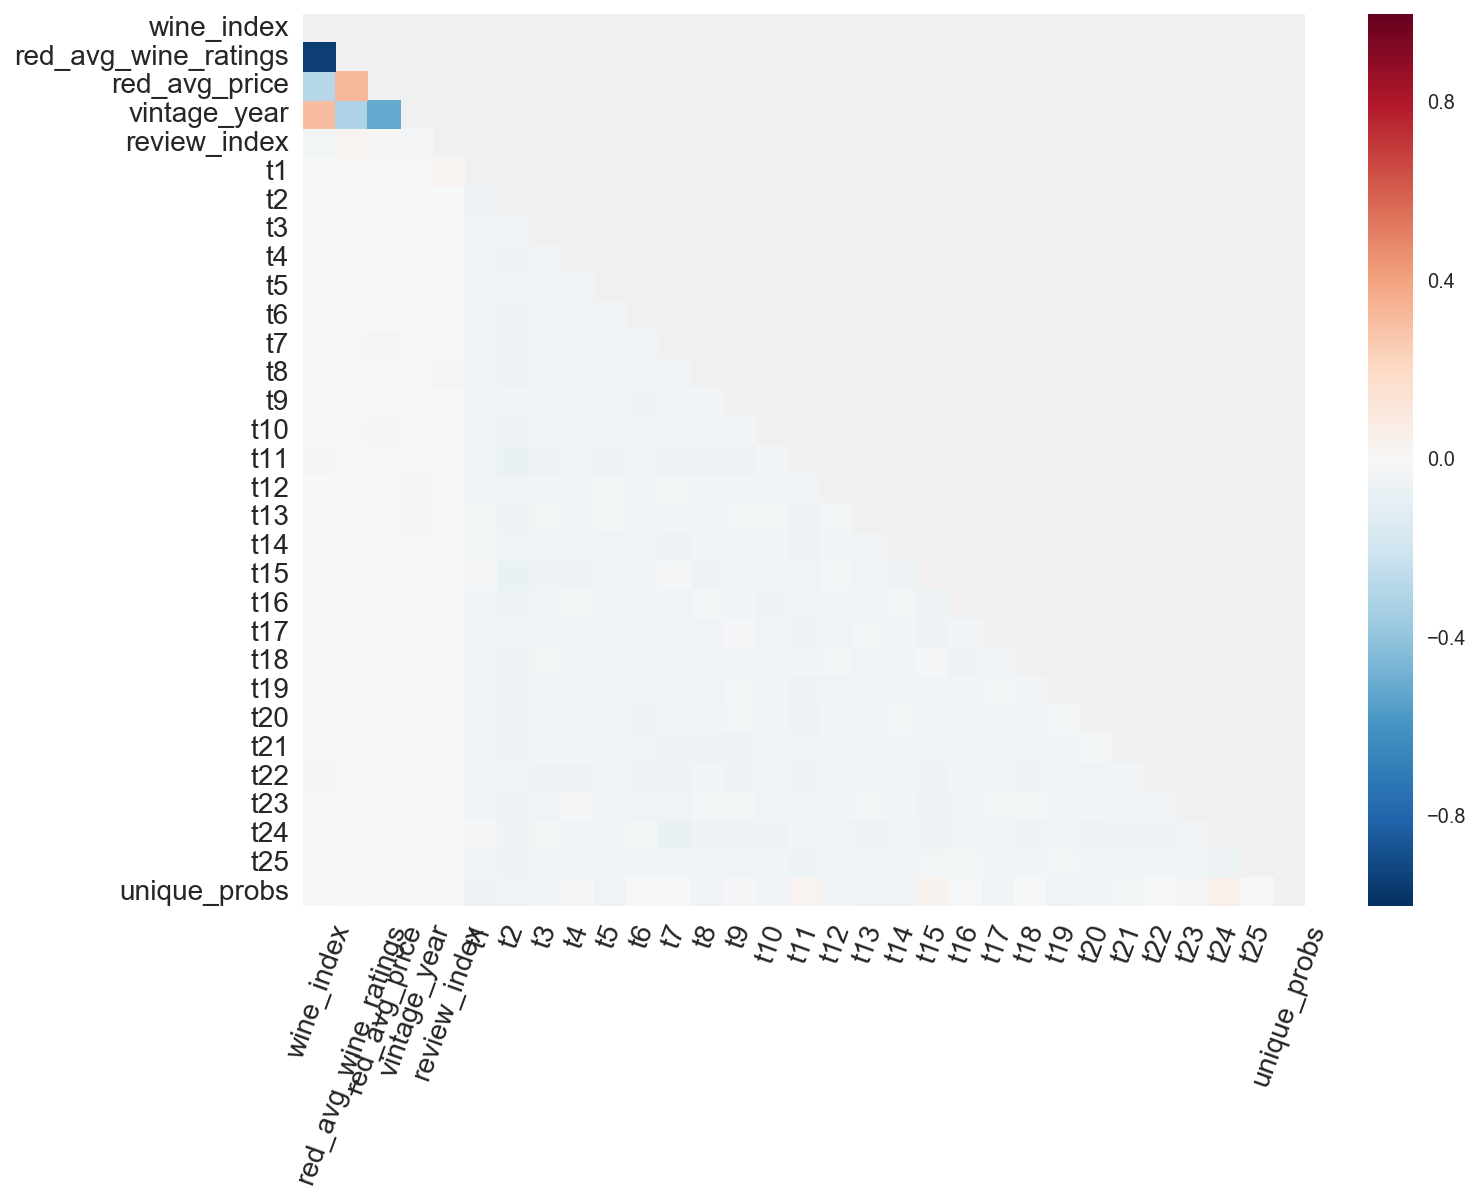

In [75]:
correlation_heat_map(red)

In [76]:
red.dropna(inplace=True)

# Linear Regression: Target is wine price

In [77]:
# Remove outliers on price, there were a few above 2000 that impacted the model. 
red_no_outliers = red[red['red_avg_price'] < 1000]

In [78]:
y = red_no_outliers.red_avg_price.values
X = red_no_outliers.iloc[:,11:36]

In [79]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn = ss.fit_transform(X)

In [80]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xn, y, cv=10)

print linreg_scores
print np.mean(linreg_scores)

[-1.38291037 -0.6622476  -0.06987682 -0.00379831 -0.22384483 -0.38372377
 -2.83738926 -3.01418062 -1.00581516 -1.07411589]
-1.06579026409


In [81]:
from sklearn.cross_validation import train_test_split

trainX, testX, trainY, testY = train_test_split(Xn, y, train_size=0.7)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

(19688, 25) (8439, 25)
(19688,) (8439,)


In [82]:
linreg_scores = cross_val_score(linreg, trainX, trainY, cv=10)
print linreg_scores

[-0.00357573 -0.00243751 -0.0027238  -0.00306284 -0.00166644 -0.00116459
 -0.0050084  -0.00116561 -0.00142548  0.00015016]


In [83]:
# Assign lm as the LinearRegression function
lm = LinearRegression()
# Fits trainX and trainY with the lm model and assigns to a variable
model = lm.fit(trainX, trainY)
# Returns Predicted Y values
predictions = model.predict(testX)
# R-squared
score = model.score(testX, testY)
print score

-0.00185899217204


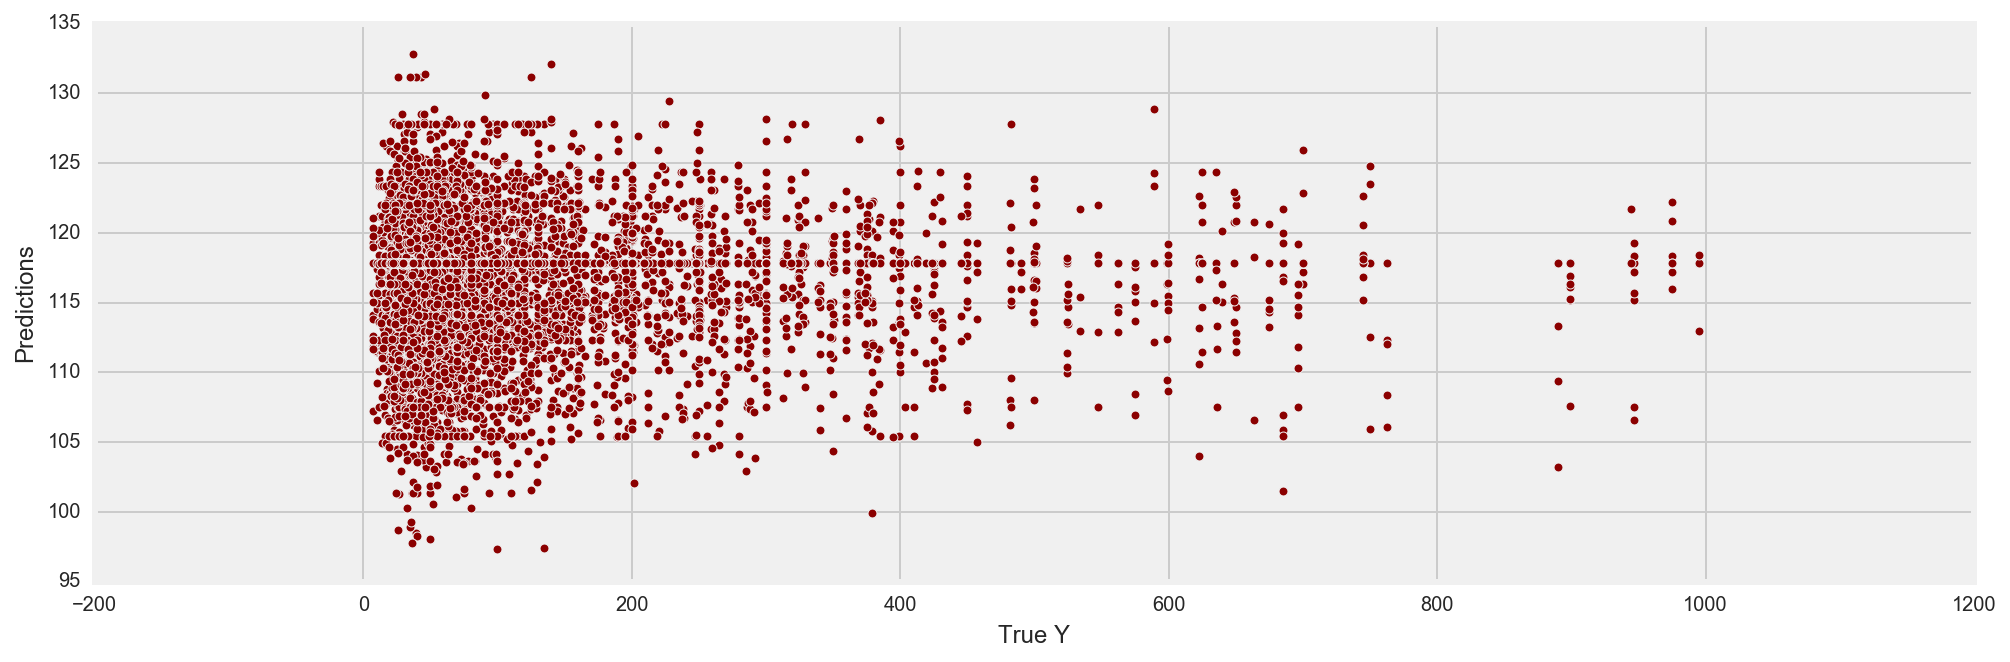

In [84]:
# Plots your True Y with Predicted Y
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
plt.scatter(testY, predictions, c='darkred')
ax.set_xlabel('True Y')
ax.set_ylabel('Predictions')

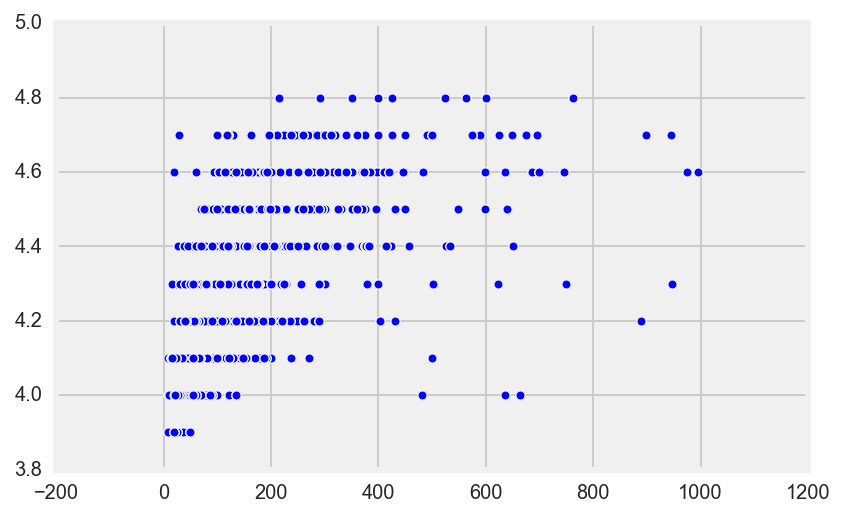

In [85]:
plt.scatter(red_no_outliers.red_avg_price, red_no_outliers.red_avg_wine_ratings)

# Linear regression: Target is wine ratings

In [86]:
y = red.red_avg_wine_ratings.values
X = red.iloc[:,11:36]

ss = StandardScaler()
Xn = ss.fit_transform(X)

trainX, testX, trainY, testY = train_test_split(Xn, y, train_size=0.7)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

(19845, 25) (8505, 25)
(19845,) (8505,)


In [87]:
# Assign lm as the LinearRegression function
lm = LinearRegression()
# Fits trainX and trainY with the lm model and assigns to a variable
model = lm.fit(trainX, trainY)
# Returns Predicted Y values
predictions = model.predict(testX)
# R-squared
score = model.score(testX, testY)
print score

-0.00193040572069


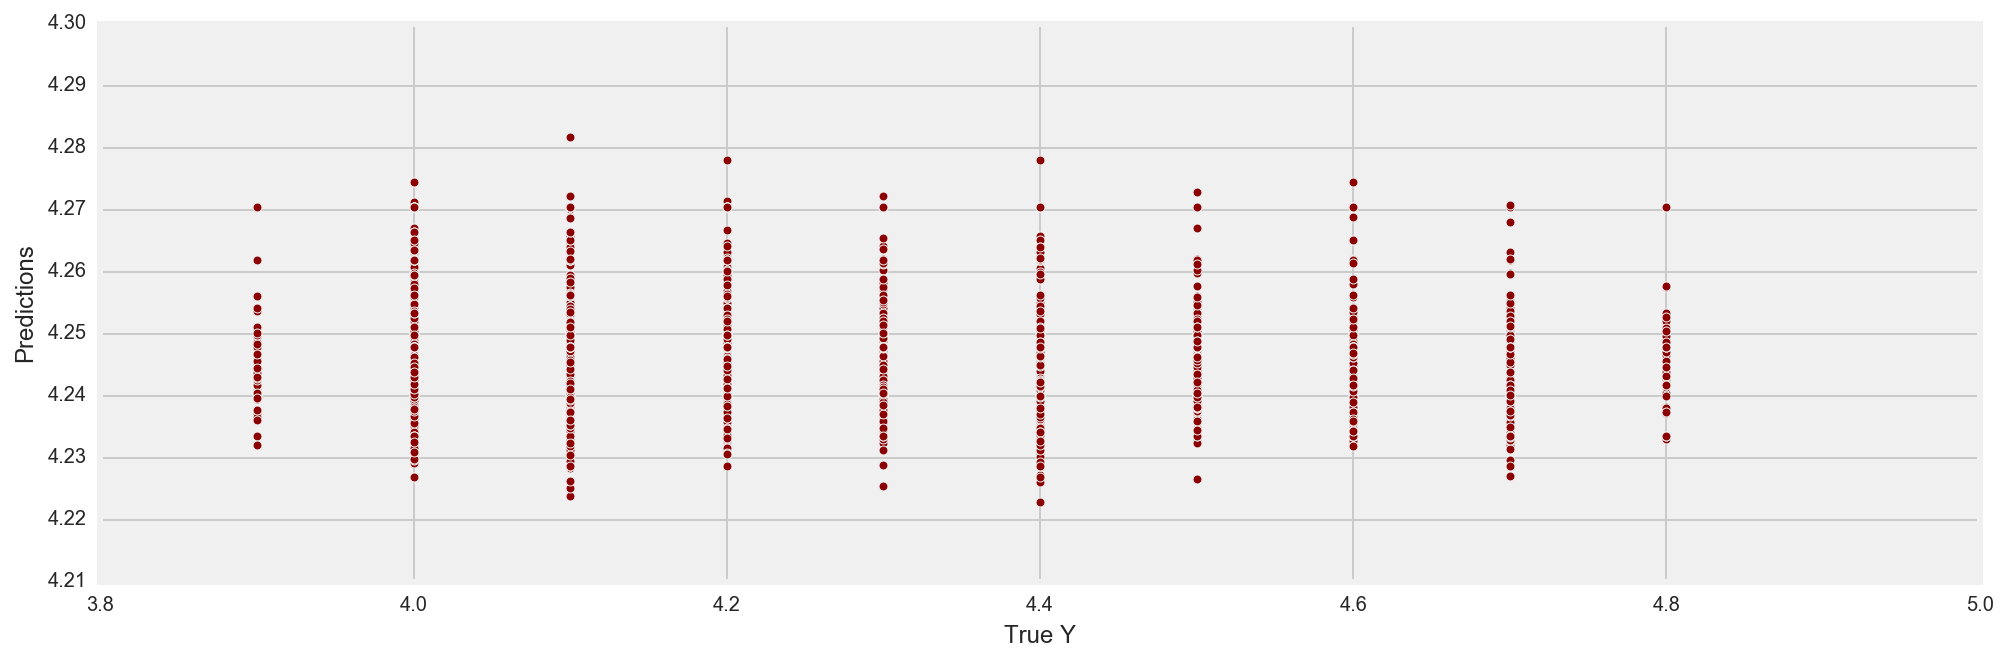

In [88]:
# Plots your True Y with Predicted Y
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
plt.scatter(testY, predictions, c='darkred')
ax.set_xlabel('True Y')
ax.set_ylabel('Predictions')